In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import imshow
from tqdm import tqdm
import torch
from torchsummary import summary

from collections import namedtuple, defaultdict
from pathlib import Path
import time

%matplotlib inline
rcParams['figure.figsize'] = (10, 15)

In [2]:
import sys
sys.path.append('..')
import os

In [3]:
from src.constructor.config_structure import TrainConfigParams
from src.registry import TASKS
from src.constructor.data import create_dataset
from train import load_config

In [4]:
config_path = '../configs/leaves_hrnet_w18_manual.yml'
config_yaml = load_config(config_path)
config = TrainConfigParams(**config_yaml)

In [5]:
data_params = config.data
common_params = data_params.common_params
other_params = data_params.train_params
dataset_name = other_params.name
# other_params = data_params.valid_params
# other_params = data_params.test_params

dataset = create_dataset(dataset_name, common_params, other_params)

In [6]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [7]:
def decode_img(tensor):
    tensor = tensor.permute(1, 2, 0).detach().cpu().numpy()
    return (np.clip(tensor * std + mean, 0., 1.) * 255).astype(np.uint8)

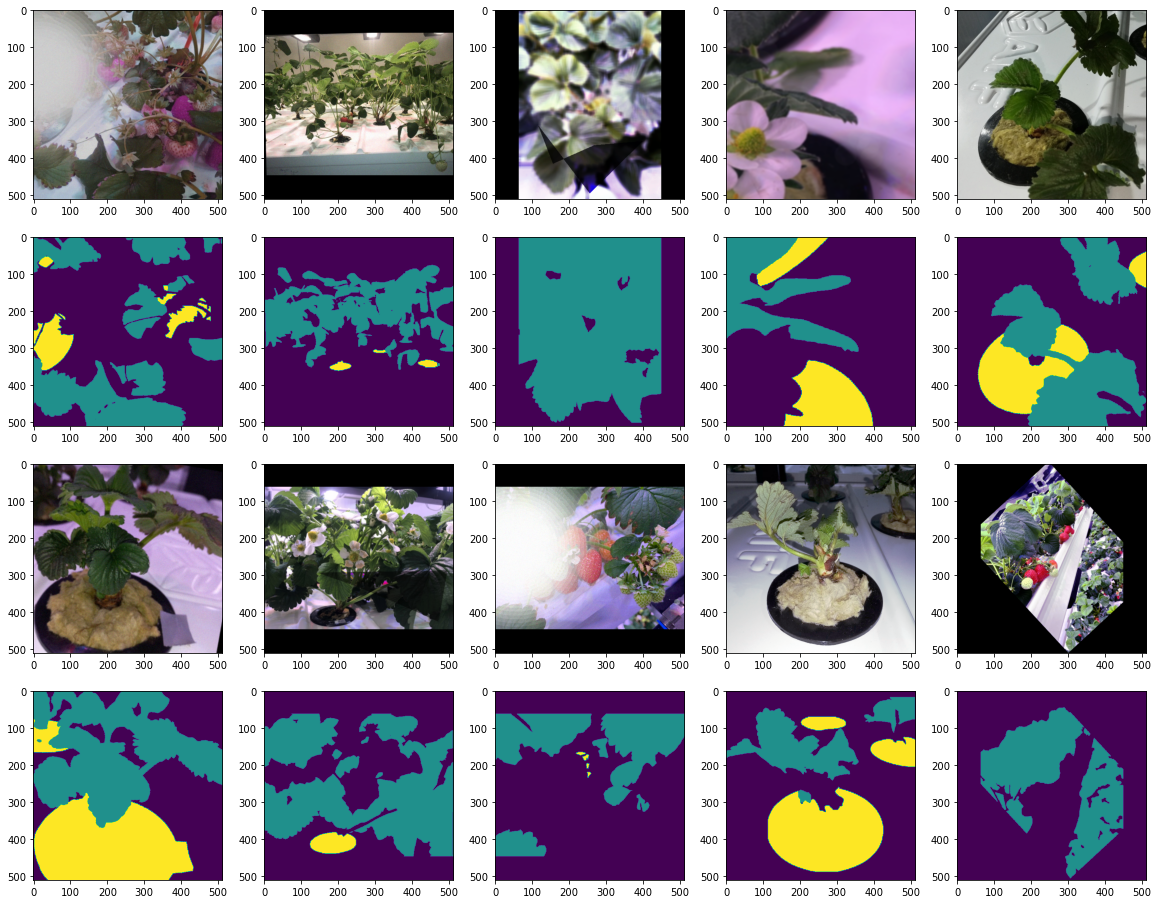

In [11]:
start_idx = 10
n_imgs = 10
n_cols = 5
fig, axs = plt.subplots(n_imgs // n_cols * 2, n_cols, figsize=(20, 8 * n_imgs // n_cols))

targets = []
for i in range(n_imgs):
    sample = dataset[start_idx + i]
    img = decode_img(sample['input'])
    mask = sample['target'].numpy()
    axs[(i // n_cols) * 2][i % n_cols].imshow(img, vmin=0, vmax=2)
    axs[(i // n_cols) * 2 + 1][i % n_cols].imshow(mask, vmin=0, vmax=2)